In [280]:
import numpy as np
import scipy.stats as iid
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from q3_functions import *

In [273]:
## Set parameters and see how J looks with true params under normal and non-normal distributions
param = [0,1]
K = 5
N = 1000

x_norm = dgp_norm(N, mu, sigma)
x_unif = dgp_unif(N, -1, 1) #so the first moment is the same

W = invOmega(param, K, x_norm)
print(J(param, K, W, x_norm))
print(J(param, K, W, x_unif)) # literally terrible

[[5.33001541]]
[[293.99848054]]


In [274]:
# initial look at the J stat for normally and non-normally distributed data with K = 5
J_crit = iid.chi2(K-1).isf(0.05) # critical value

param_norm, J_norm = two_step_gmm(K, x_norm)
param_unif, J_unif = two_step_gmm(K, x_unif)

print(J_crit)
print(J_unif[0])
print(J_norm[0])

9.487729036781158
[369.61043715]
[1.64637535]


In [275]:
# get K, mu, sigma with different values of k
maxK = 10

J_norm_list = np.array([two_step_gmm(k, x_norm)[1] for k in range(2,maxK)]).reshape(-1,1)
J_unif_list = np.array([two_step_gmm(k, x_unif)[1] for k in range(2,maxK)]).reshape(-1,1)

mu_norm_list = np.array([two_step_gmm(k, x_norm)[0][0] for k in range(2,maxK)]).reshape(-1,1)
mu_unif_list = np.array([two_step_gmm(k, x_unif)[0][0] for k in range(2,maxK)]).reshape(-1,1)

sigma_norm_list = np.array([two_step_gmm(k, x_norm)[0][1] for k in range(2,maxK)]).reshape(-1,1)
sigma_unif_list = np.array([two_step_gmm(k, x_unif)[0][1] for k in range(2,maxK)]).reshape(-1,1)

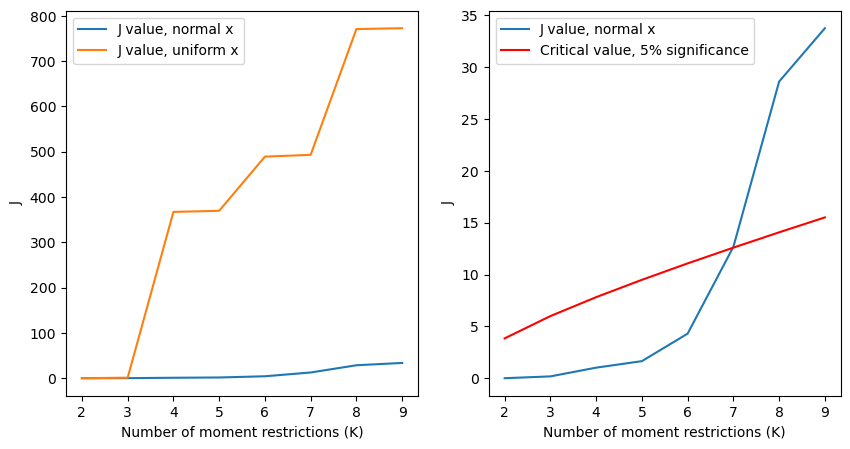

In [276]:
kgrid = np.arange(2,maxK)
jcrit = np.array([iid.chi2(k-1).isf(0.05) for k in range(2,maxK)]).reshape(-1,1)
# plot these bad boys 
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(kgrid, J_norm_list, label = "J value, normal x")
ax[0].plot(kgrid, J_unif_list, label = "J value, uniform x")
ax[0].set(xlabel = 'Number of moment restrictions (K)', ylabel = 'J')
ax[0].legend()

ax[1].plot(kgrid, J_norm_list, label = "J value, normal x")
ax[1].plot(kgrid, jcrit, color = "red", label = "Critical value, 5% significance")
ax[1].set(xlabel = 'Number of moment restrictions (K)', ylabel = 'J')
ax[1].legend()


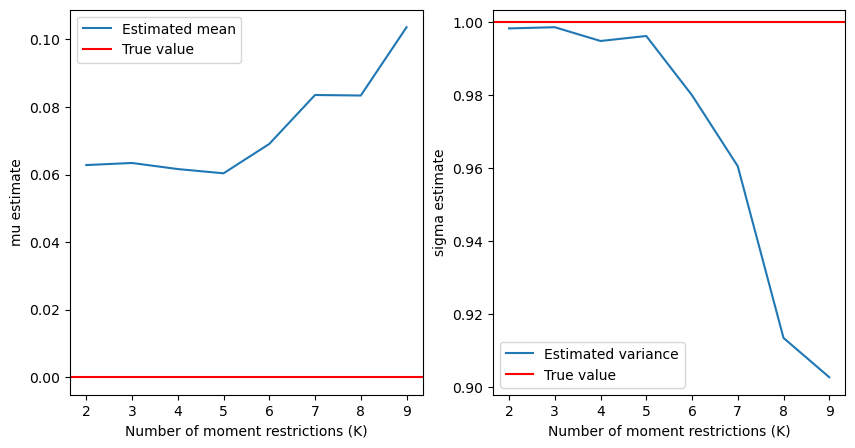

In [282]:
# plot how the estimates of each parameter change as we increase K
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(kgrid, mu_norm_list, label = "Estimated mean")
ax[0].axhline(0, color = "red", label = "True value")
ax[0].set(xlabel = 'Number of moment restrictions (K)', ylabel = 'mu estimate')
ax[0].legend()

ax[1].plot(kgrid, sigma_norm_list, label = "Estimated variance")
ax[1].axhline(1, color = "red", label = "True value")
ax[1].set(xlabel = 'Number of moment restrictions (K)', ylabel = 'sigma estimate')
ax[1].legend()

In [289]:
# compare estimates from using K = 5 and mle
gmm_est = two_step_gmm(5, x_normal)
gmm_est2 = two_step_gmm(15, x_normal)
gmm_est3 = two_step_gmm(2, x_normal)

# MLE estimates
mle_est = minimize(lambda param: MLE_norm(param, x_normal), np.array([1,1]), method='Nelder-Mead')

# print estimates
print(f"True parameters = {param}")
print(f"Estimates from MLE = {mle_est.x}")
print(f"Estimates from two step gmm (K = 2) = {gmm_est3[0]}")
print(f"Estimates from two step gmm (K = 5) = {gmm_est[0]}")
print(f"Estimates from two step gmm (K = 15) = {gmm_est2[0]}")

True parameters = [0, 1]
Estimates from MLE = [-0.00573955  1.01022448]
Estimates from two step gmm (K = 2) = [-0.0057427   1.01023801]
Estimates from two step gmm (K = 5) = [-0.01556838  1.00199099]
Estimates from two step gmm (K = 15) = [0.00827914 0.74839344]
